In [6]:
ano = 2025
caminho_dados = f"/content/drive/MyDrive/AD/{ano}_Viagem.csv"
caminho_saida_tabela = f"/content/drive/MyDrive/AD/output/tabela_passa_viag_{ano}.xlsx"
caminho_saida_grafico = f"/content/drive/MyDrive/AD/output/grafico_bar_{ano}.png"

In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding='Windows-1252', sep=';', decimal=",")

# Criando nova coluna de despesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna("NÃO IDENTIFICADO")

# Convertendo colunas de datas
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format="%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format="%d/%m/%Y")

# Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [8]:
# Criando tabela consolidada
df_viagens_consolidado = (
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media = ('Despesas', 'mean'),
        duracao_media=('Dias de viagem', 'mean'),
        despesas_totais = ('Despesas', 'sum'),
        destino_mais_frequente=("Destinos", pd.Series.mode),  # Modo de trazer a Moda no pandas
        n_viagens = ('Nome', 'count')
        )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False)
    )

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

# Salvando a tabela final
df_final.to_excel(caminho_saida_tabela, index=False)

In [9]:
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
545,NÃO IDENTIFICADO,3811.37,7.55,1090211753.09,Brasília/DF,286042
496,Informações protegidas por sigilo,3539.92,7.45,389454950.44,Informações protegidas por sigilo,110018
634,PROFESSOR DO MAGISTERIO SUPERIOR,2212.30,3.53,112926943.94,Brasília/DF,51045
635,PROFESSOR ENS BASICO TECN TECNOLOGICO,1573.72,2.31,59939819.79,Brasília/DF,38088
356,CONTRATADO LEI 8745/93 - NI,772.51,2.10,14156211.00,Sena Madureira/AC,18325
245,AUDITOR FISCAL FEDERAL AGROPECUARIO,1470.76,1.95,25260344.82,Brasília/DF,17175
96,ANALISTA AMBIENTAL,2982.16,5.43,48009850.71,Brasília/DF,16099
210,ASSISTENTE EM ADMINISTRAçãO,1507.86,2.17,16333163.17,Brasília/DF,10832
760,TECNICO DO SEGURO SOCIAL,4991.00,12.16,48677244.99,Brasília/DF,9753
246,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2925.90,2.98,26584710.05,Brasília/DF,9086


<Axes: xlabel='Cargo'>

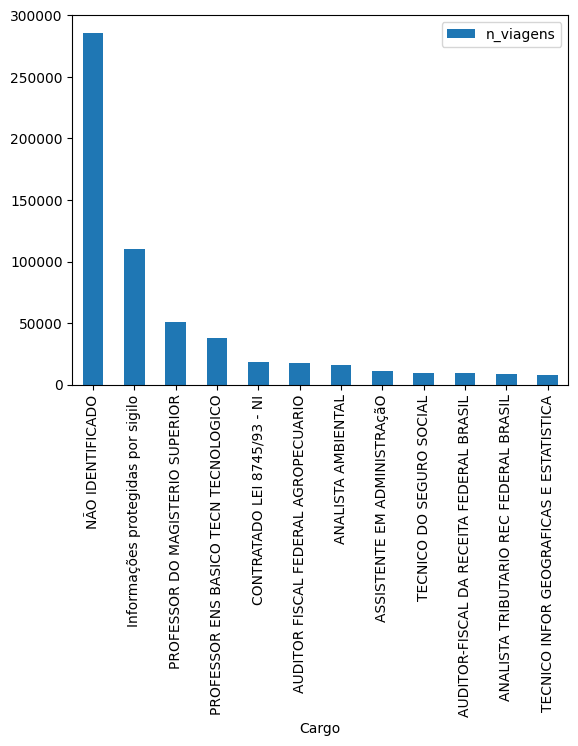

In [10]:
df_final.plot(x="Cargo", y="n_viagens", kind="bar")

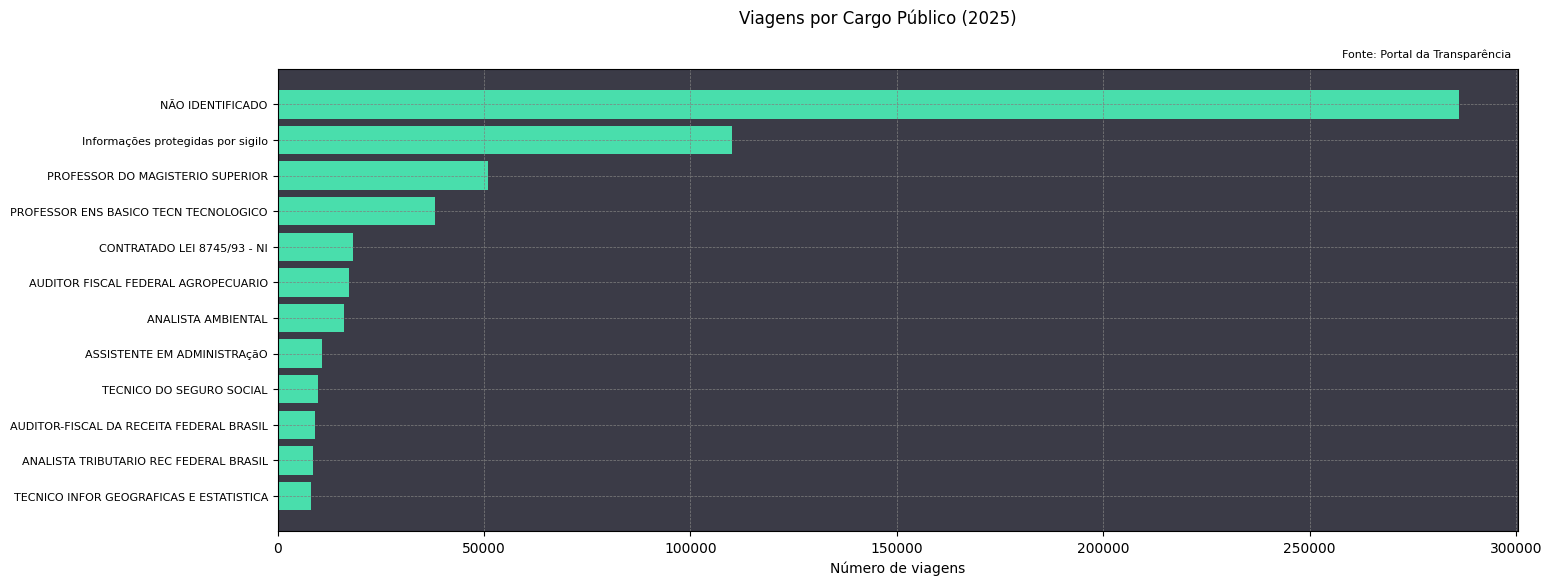

In [11]:
import matplotlib.pyplot as plt

# Caminho para salvar imagem - gráfico
caminho_figura = "/content/drive/MyDrive/AD/output/figura_bar.png"

# Criando a figura
fig, ax = plt.subplots(figsize=(16,6))

# Plotando o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color="#49deac")
ax.invert_yaxis()

# Ajustando o gráfico
ax.set_facecolor('#3b3b47')
fig.suptitle('Viagens por Cargo Público (2025)')
plt.figtext(0.79, 0.90,'Fonte: Portal da Transparência', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize = 8)
plt.xlabel('Número de viagens')

# Exibindo o gráfico
#plt.show()

# Comando Salvar Figura do Gráfico
plt.savefig(caminho_figura, bbox_inches='tight')

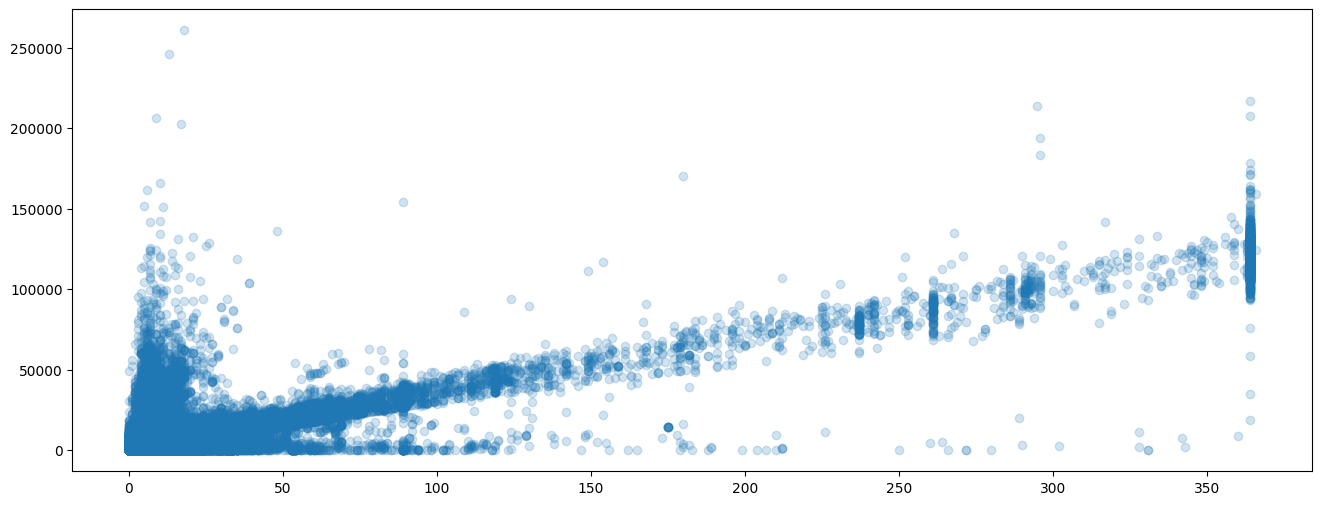

In [13]:
fig, ax = plt.subplots(figsize=(16,6))

ax.scatter(df_viagens['Dias de viagem'], df_viagens['Despesas'], alpha=0.2)

# Zoom no gráfico para checar mais detalhes
#ax.set_xlim(0, 100)
#ax.set_ylim(0, 25_000)



In [14]:
#df_viagens['Despesas'] > 200_000

# Contagem de Viagens acima de 200.000
(df_viagens['Despesas'] > 200_000).value_counts()

,count
Despesas,
False,774483
True,7


In [15]:
filtro_200 = df_viagens['Despesas'] > 200_000
df_viagens[filtro_200]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem
418,20557147,000836/25-26C,Realizada,SIM,Conforme Diárias e Passagens e autorizações em...,30000,Ministério da Justiça e Segurança Pública,30000,Ministério da Justiça e Segurança Pública - Un...,***.096.192-**,JULYANA DOS SANTOS COELHO,NÃO IDENTIFICADO,-1,Sem informação,2025-01-01,2025-12-31,"Brasília/DF, Rio Branco/AC, Cruzeiro do Sul/AC...",Em continuidade à PCDP: 001178/24. Centro de C...,128253.75,88475.61,0.00,0.00,216729.36,January,364
1698,20649880,001382/25-19C,Realizada,SIM,Conforme Diárias e Passagens.,30000,Ministério da Justiça e Segurança Pública,30000,Ministério da Justiça e Segurança Pública - Un...,***.468.361-**,BRUNO REZENDE CABRAL,NÃO IDENTIFICADO,-1,Sem informação,2025-01-01,2025-12-31,"Brasília/DF, Rio de Janeiro/RJ, Angra dos Reis...",Em continuidade à PCDP: 000844/24. Centro de C...,131078.75,76141.39,0.00,0.00,207220.14,January,364
10445,20690771,000015/25,Realizada,SIM,Justifica-se em razão da confirmação da viagem...,32000,Ministério de Minas e Energia,32000,Ministério de Minas e Energia - Unidades com v...,***.100.897-**,PIETRO ADAMO SAMPAIO MENDES,ESP REG DE PET E DER ALC COMB E GAS NAT,CCX-0117,CCX-0117,2025-01-08,2025-01-21,"Abu Dabi/Emirados Árabes, Riad/Arábia Saudita,...",Justifica-se em razão da necessidade de acompa...,15775.96,229149.22,0.00,927.62,245852.80,January,13
42921,20733847,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30000,Ministério da Justiça e Segurança Pública - Un...,ID003400209,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2025-01-09,2025-10-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,213987.50,0.00,0.00,0.00,213987.50,January,295
185913,20914280,005196/25-1C,Realizada,SIM,Atender demanda do CEMCFA,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.690.907-**,RENATO RODRIGUES DE AGUIAR FREIRE,NÃO IDENTIFICADO,CCX-0118,CCX-0118,2025-05-16,2025-06-03,Cingapura/Cingapura,Cerimônia de abertura do Defense and Security ...,38325.97,220393.54,590.94,1976.95,260696.46,May,18
222393,20961121,001706/25,Realizada,SIM,Chamada de urgência pelo Senado Federal para f...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.783.236-**,BERNARD JORG LEOPOLD DE GARCIA KLINGL,MINISTRO DE PRIMEIRA CLASSE,-1,Sem informação,2025-05-03,2025-05-12,Brasília/DF,Chamada de urgência pelo Senado Federal para f...,4132.50,202034.01,0.00,0.00,206166.51,May,9
493933,21310516,001064/25,Realizada,SIM,Cumprimento de compromissos institucionais est...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.742.118-**,ANA AMELIA CAMPOS TONI,NÃO IDENTIFICADO,CCX-0117,CCX-0117,2025-08-30,2025-09-16,"Nova Delhi/Índia, Adis-Ababa/Etiópia, Beijing/...",Afastamento do país da Diretora-Executiva da P...,27400.35,174285.90,0.00,663.02,202349.27,August,17


In [16]:
caminho_dados_passagens = "/content/drive/MyDrive/AD/2025_Passagem.csv"

In [17]:
df_passagens = pd.read_csv(caminho_dados_passagens, encoding='Windows-1252', sep=';', decimal=',')
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,20286869,000002/25,Aéreo,Brasil,Tocantins,Palmas,Brasil,Paraná,Maringá,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1272.97,0.00,17/09/2024,11:43
1,20286869,000002/25,Aéreo,Brasil,Paraná,Maringá,Brasil,Tocantins,Palmas,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1271.77,0.00,17/09/2024,11:43
2,20289421,000001/25,Aéreo,Colômbia,NaN,Bogotá,Brasil,Minas Gerais,Uberlândia,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4329.72,0.00,17/10/2024,14:46
3,20289650,000004/25,Aéreo,Reino Unido,NaN,Londres,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7109.73,0.00,07/10/2024,16:34
4,20289787,000003/25,Aéreo,Reino Unido,NaN,Londres,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7109.73,0.00,07/10/2024,16:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400088,2025002380,Sem informaçã,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2681.05,0.00,NaN,00:00
400089,2025002397,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Ceará,Fortaleza,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3151.72,0.00,NaN,00:00
400090,2025002397,Sem informaçã,Aéreo,Brasil,Ceará,Fortaleza,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3349.78,0.00,NaN,00:00
400091,2025002398,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2069.52,0.00,NaN,00:00


In [18]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 20289421 ]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
2,20289421,000001/25,Aéreo,Colômbia,NaN,Bogotá,Brasil,Minas Gerais,Uberlândia,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4329.72,0.00,17/10/2024,14:46


In [19]:
# Combinar 2 tabelas no Python com colunas de mesmo nome.
df_viagens.merge(df_passagens)

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,20286869,000002/25,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26241,Universidade Federal do Paraná,***.235.999-**,ALMIR MANOEL CUNICO,PROFESSOR DO MAGISTERIO SUPERIOR,FG-0001,FG-0001,2025-01-25,2025-02-01,Palmas/TO,PARTICIPAÇÃO DO XXV ENCONTRO BRASILEIRO DE ICT...,0.00,2544.74,0.00,0.00,2544.74,January,7,Aéreo,Brasil,Tocantins,Palmas,Brasil,Paraná,Maringá,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1272.97,0.00,17/09/2024,11:43
1,20286869,000002/25,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26241,Universidade Federal do Paraná,***.235.999-**,ALMIR MANOEL CUNICO,PROFESSOR DO MAGISTERIO SUPERIOR,FG-0001,FG-0001,2025-01-25,2025-02-01,Palmas/TO,PARTICIPAÇÃO DO XXV ENCONTRO BRASILEIRO DE ICT...,0.00,2544.74,0.00,0.00,2544.74,January,7,Aéreo,Brasil,Paraná,Maringá,Brasil,Tocantins,Palmas,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1271.77,0.00,17/09/2024,11:43
2,20289421,000001/25,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,***.396.790-**,ROMULO FABIANO PACHECO RAVAZIO,NÃO IDENTIFICADO,OfSuperior,OfSuperior,2025-01-05,2025-01-07,"Bogotá/Colômbia, Uberlândia/MG",Movimentação de militar por término de missão ...,0.00,4329.72,0.00,1240.09,5569.81,January,2,Aéreo,Colômbia,NaN,Bogotá,Brasil,Minas Gerais,Uberlândia,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4329.72,0.00,17/10/2024,14:46
3,20289650,000004/25,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,***.329.397-**,ALFREDO DIAS DE OLIVEIRA JUNIOR,NÃO IDENTIFICADO,Subtenente,Subtenentes,2025-01-04,2025-01-06,"Londres/Reino Unido, Brasília/DF",Movimentação de militar por término de missão ...,0.00,7109.73,0.00,1053.53,8163.26,January,2,Aéreo,Reino Unido,NaN,Londres,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7109.73,0.00,07/10/2024,16:34
4,20289787,000003/25,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,NaN,FRANCISCA LEILA DE PAULA VIEIRA DE OLIVEIRA,NÃO IDENTIFICADO,-1,Sem informação,2025-01-04,2025-01-06,"Londres/Reino Unido, Brasília/DF",DEPENDENTE (Esposa) do S Ten Inf ALFREDO DIAS ...,0.00,7109.73,0.00,0.00,7109.73,January,2,Aéreo,Reino Unido,NaN,Londres,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7109.73,0.00,07/10/2024,16:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400112,2025002380,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.670.131-**,MARIA DO P SOCORRO A CARDOSO DE CASTRO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2025-11-19,2025-11-20,Sem informação,Assessorar o Diretor no Evento 'Central Bankin...,1249.55,5161.92,0.00,0.00,6411.47,November,1,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informaçã

In [20]:
caminho_saida = "/content/drive/MyDrive/AD/output/tabela_passa_viagem.xlsx"

In [21]:
# Salvar tabela e converte para excel c/ indice
#df_final.to_excel(caminho_saida)

# Sem indice
df_final.to_excel(caminho_saida, index=False)

# Converter em CSV
# df_final.to_csv()